# Dataset arbres
Source : http://data.metropolegrenoble.fr/ckan/dataset/les-arbres-de-grenoble
## Exploration préliminaire des données

Idées de sujet : 
- Quel a été le maire le plus vert sur la période concernée ? 
- Quelles sont les 5 espèces d'arbres les plus représentées à Grenoble ? 
- Combien y a-t-il d'arbres "solitaires", i.e. uniques représentants de leur espèce ? 

In [43]:
import csv
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import random

In [44]:
# Import du style
!jt -t monokai -fs 95 -altp -tfs 11 -nfs 115 -cellw 88% -T
plt.style.use('bmh')

In [45]:
# Chargement des données dans un dataframe pandas
df = pd.read_csv('data/arbres.csv')

-------------------------------------------------
### Nombre d'entrées non nulles dans chaque colonne

Remarques : 
- pas d'info sur l'année d'abattage (sont ils tous encore en vie ?) 
- Pas d'info sur le diamètre des arbres

--------------------------------------------------

In [46]:
df.count()

ELEM_POINT_ID            31243
CODE                     31243
NOM                      31243
GENRE                    31243
GENRE_DESC               31243
CATEGORIE                31243
CATEGORIE_DESC           31243
SOUS_CATEGORIE           31243
SOUS_CATEGORIE_DESC      31243
CODE_PARENT              31243
CODE_PARENT_DESC         31243
ADR_SECTEUR              31243
BIEN_REFERENCE           31243
GENRE_BOTA               30728
ESPECE                   29053
VARIETE                   4039
STADEDEDEVELOPPEMENT     29228
EQUIPE                       0
REMARQUES                    0
ANNEEDEPLANTATION        30801
RAISONDEPLANTATION        1050
TRAITEMENTCHENILLES       2338
COURRIER                     0
IDENTIFIANTPLU             610
TYPEIMPLANTATIONPLU        610
INTITULEPROTECTIONPLU      610
ANNEEABATTAGE                0
ESSOUCHEMENT                 0
DIAMETREARBRE                0
CAUSEABATTAGE                0
COLLECTIVITE             30804
GeoJSON                  31243
dtype: i

--------------------------------------------------
On enlève les colonnes sans aucune entrée => pas de valeur 

---------------------------------------------------

In [47]:
bools = (df.count() > 0)
df = df.loc[:, bools.values]

On regarde un peu à quoi ressemblent les données ! 

In [48]:
df.head()

,ELEM_POINT_ID,CODE,NOM,GENRE,GENRE_DESC,CATEGORIE,CATEGORIE_DESC,SOUS_CATEGORIE,SOUS_CATEGORIE_DESC,CODE_PARENT,...,VARIETE,STADEDEDEVELOPPEMENT,ANNEEDEPLANTATION,RAISONDEPLANTATION,TRAITEMENTCHENILLES,IDENTIFIANTPLU,TYPEIMPLANTATIONPLU,INTITULEPROTECTIONPLU,COLLECTIVITE,GeoJSON
0,37993,ESP37969,ESP37969,VEG,VEGETATION,ESP01,Arbre,ESP065,Arbre d'enceintes fermées,ESP37898,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"{""type"":""Point"",""coordinates"":[5.7603469008942..."
1,37992,ESP37968,ESP37968,VEG,VEGETATION,ESP01,Arbre,ESP065,Arbre d'enceintes fermées,ESP37898,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"{""type"":""Point"",""coordinates"":[5.7598264646441..."
2,37991,ESP37967,ESP37967,VEG,VEGETATION,ESP01,Arbre,ESP065,Arbre d'enceintes fermées,ESP37898,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"{""type"":""Point"",""coordinates"":[5.7599807314486..."
3,37990,ESP37966,ESP37966,VEG,VEGETATION,ESP01,Arbre,ESP065,Arbre d'enceintes fermées,ESP37898,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"{""type"":""Point"",""coordinates"":[5.7600570301267..."
4,37989,ESP37965,ESP37965,VEG,VEGETATION,ESP01,Arbre,ESP065,Arbre d'enceintes fermées,ESP37898,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"{""type"":""Point"",""coordinates"":[5.7600202792924..."


------------------------------------------
### Combien d'éléments uniques dans chaque colonne ? 
Remarques : 
- nbre d'ID = nbre d'arbres
- 255 espèces d'arbres répertoriées
- Quelle est la hiérarchie dans GENRE_BOTA, ESPECE et VARIETE ? 

--------------------------------------------

In [49]:
df.nunique()

ELEM_POINT_ID            31243
CODE                     31243
NOM                      31243
GENRE                        1
GENRE_DESC                   1
CATEGORIE                    1
CATEGORIE_DESC               1
SOUS_CATEGORIE               4
SOUS_CATEGORIE_DESC          4
CODE_PARENT               1447
CODE_PARENT_DESC          1447
ADR_SECTEUR                  6
BIEN_REFERENCE           31243
GENRE_BOTA                 112
ESPECE                     255
VARIETE                    146
STADEDEDEVELOPPEMENT         3
ANNEEDEPLANTATION           58
RAISONDEPLANTATION           3
TRAITEMENTCHENILLES          3
IDENTIFIANTPLU              46
TYPEIMPLANTATIONPLU          4
INTITULEPROTECTIONPLU        3
COLLECTIVITE                 2
GeoJSON                  31242
dtype: int64

--------------------------
### Quels sont les éléments uniques dans chaque colonne ? 

--------------

In [50]:
# j'applique la fonction set sur chacune des colonnes du dataframe
# (set permet de récupérer les éléments uniques et de les ranger dans un "set")
sets = df.apply(set)

# J'enlève les nan
for col in df.columns.values: 
    sets[col] = {x for x in sets[col] if pd.notna(x)}

In [51]:
sets

ELEM_POINT_ID            {1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...
CODE                     {ESP32027, ESP26503, ESP2031, ESP5458, ESP7666...
NOM                      {ESP32027, ESP26503, ESP2031, ESP5458, ESP7666...
GENRE                                                                {VEG}
GENRE_DESC                                                    {VEGETATION}
CATEGORIE                                                          {ESP01}
CATEGORIE_DESC                                                     {Arbre}
SOUS_CATEGORIE                            {ESP151, ESP065, ESP174, ESP187}
SOUS_CATEGORIE_DESC      {Arbre d'enceintes fermées, Bois semi naturel,...
CODE_PARENT              {ESP655, ESP721, ESP98, ESP1229, ESP495, ESP30...
CODE_PARENT_DESC         {R des Arts pas Colbert, Bd J Pain Forum sép c...
ADR_SECTEUR                                             {1, 2, 3, 4, 5, 6}
BIEN_REFERENCE           {AR26928, AR29475, AR12527, AR10846, AR20365, ...
GENRE_BOTA               

In [52]:
# 10 éléments random dans "ESPECE" (pour voir à quoi ça ressemble)
random.sample(sets['ESPECE'], 10)

['nivalis',
 'europaea',
 'pisifera',
 'oblonga',
 'anagynoides',
 'australis',
 'communis',
 'utilis',
 'villosa',
 'regia']

In [53]:
# 10 éléments random dans "ESPECE" (idem)
random.sample(sets['CODE_PARENT_DESC'], 10)

['Cité Mistral R A France n 45',
 'Cité Mistral R A Thomas impair',
 'R du 140 RIA Ouest',
 'R Manteyer 01à13 ang J O',
 'R Esmonin IMT',
 'Av Berthelot pair ang Peretto',
 'Centre social des Eaux Claires',
 'Ave Randon FC Allobroges Saul',
 'R Francis James park',
 'Ave F Viallet Gambetta Belg']

## Visualisation des données

Combien d'arbres plantés année par année ? \
Le maire le + vert => Hubert Dubedout (1975)


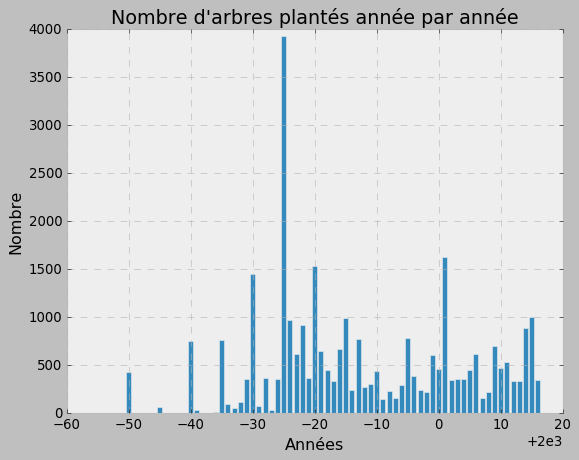

In [54]:
years = range(int(min(sets['ANNEEDEPLANTATION'])), int(max(sets['ANNEEDEPLANTATION'])))
nbre_arbres_year = []
for year in years: 
    nbre_arbres_year.append(df[df.ANNEEDEPLANTATION == year].shape[0])

plt.bar(years, nbre_arbres_year)
plt.ylabel("Nombre")
plt.xlabel("Années")
plt.title("Nombre d'arbres plantés année par année"); 
plt.show()

## Statistiques sur la répartition des arbres 

Arbres les plus/ moins représentés à Grenoble ?

In [55]:
data = []
for espece in sets['ESPECE']: 
    data.append({'Espece': espece, 'Nombre': df[df.ESPECE == espece].shape[0]}) 
    
df_repartition = pd.DataFrame(data) 

In [56]:
# Les arbres les plus représentés
df_repartition.nlargest(10, 'Nombre')

,Espece,Nombre
41,acerifolia,4422
113,nigra,1940
214,pseudoplatanus,1347
61,betulus,1282
210,platanoides,1131
122,tomentosa,1079
182,campestre,861
253,cordata,807
1,styraciflua,806
164,excelsior,776


In [57]:
# Les arbres uniques à Grenoble
df_repartition[df_repartition['Nombre'] == 1]

,Espece,Nombre
19,bumalda,1
25,phellos,1
36,zoeschense,1
44,koreana,1
45,magnificum,1
46,coccinea,1
48,auricularis,1
53,alaternus,1
59,chamaemespilus,1
64,monticola,1


Description générale => pas beaucoup d'intérêt dans ce cas

In [58]:
df_repartition['Nombre'].describe()

count     255.000000
mean      113.933333
std       357.936540
min         1.000000
25%         3.000000
50%        12.000000
75%        74.000000
max      4422.000000
Name: Nombre, dtype: float64

Plot des 50 espèces les plus représentées à Grenoble

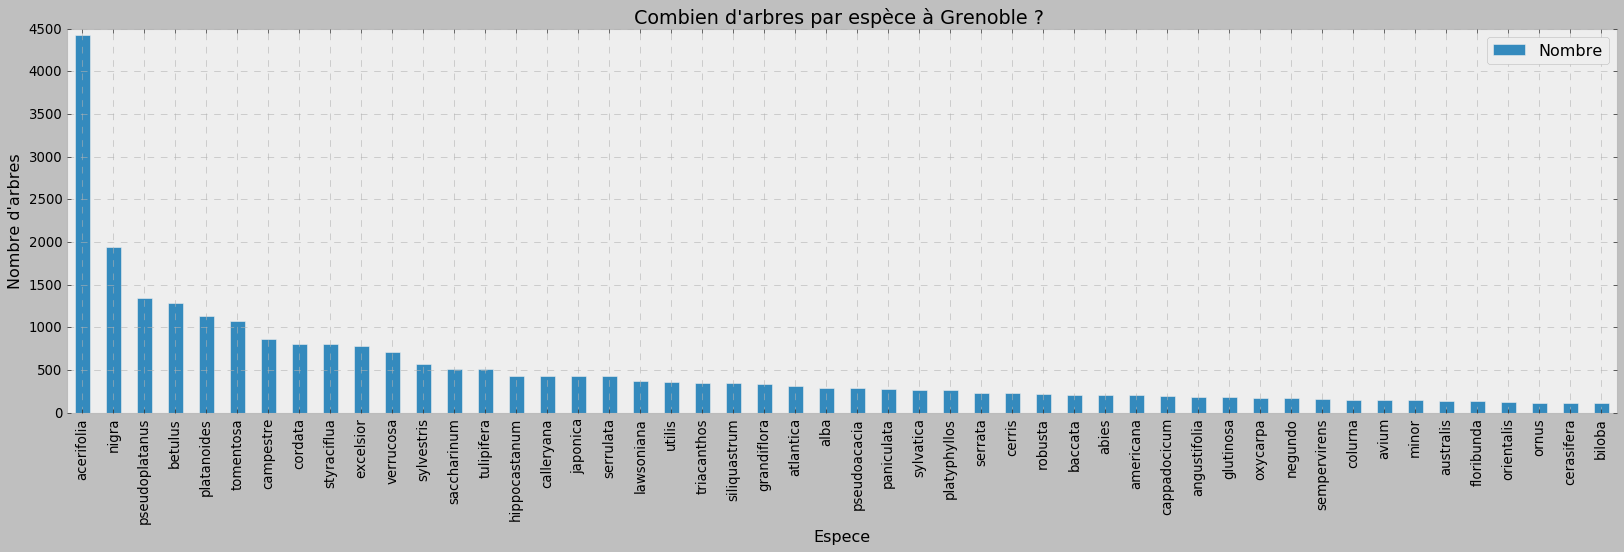

In [97]:
plt.figure(figsize=(25,6))
df_repartition.nlargest(50, 'Nombre').plot(kind='bar',x='Espece',y='Nombre', ax = plt.gca())
plt.ylabel("Nombre d'arbres")
plt.title("Combien d'arbres par espèce à Grenoble ? ")
plt.show()

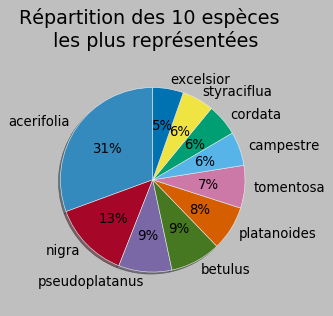

In [90]:
# Répartition des 10 espèces les plus représentées dans un Pie Chart
nbre = 10
labels = df_repartition.nlargest(nbre, 'Nombre')["Espece"]
sizes = df_repartition.nlargest(nbre, 'Nombre')["Nombre"]

plt.figure(figsize=(3,4))
ax1 = plt.gca()
ax1.pie(sizes, labels=labels, autopct='%1.0f%%', shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title(f"Répartition des {nbre} espèces \n les plus représentées")
plt.show()

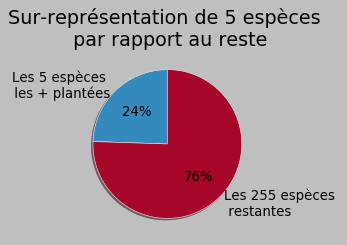

In [87]:
nbre = 5

plus_representes = df_repartition.nlargest(nbre, 'Nombre')["Nombre"].sum()
moins_representes = df.shape[0]
sizes = [plus_representes, moins_representes]
labels = [f"Les {nbre} espèces \n les + plantées", f"Les {df_repartition.shape[0]} espèces \n restantes"]

plt.figure(figsize=(3,6))
ax1 = plt.gca()
ax1.pie(sizes, labels=labels, autopct='%1.0f%%', shadow=True, startangle=90)
plt.title(f"Sur-représentation de {nbre} espèces \n par rapport au reste")
plt.show()

### Exploration de la hiérarchie : genre botanique / espèce / variété 

genre botanique <br>
&emsp; &emsp; |_ espèce <br>
&emsp; &emsp; &emsp; &emsp; |_ variété <br>
<br> <br>
La variable sets_genre est une série dont les index sont les genre botaniques, la valeur associée à chaque genre botanique est un set des espèces représentées

In [197]:
sets_genre = pd.Series(index=list(sets['GENRE_BOTA']), 
                       data=[set() for _ in range(112)])

for genre in sets_genre.index:
    list_espece = df[df.GENRE_BOTA == genre]['ESPECE'].values
    for espece in list_espece:
        sets_genre[genre].add(espece)     
        
print(sets_genre)

Trachycarpus                                           {fortunei}
Platanus                  {nan, orientalis, platanor, acerifolia}
Eriobotrya                                             {japonica}
Liriodendron                                    {nan, tulipifera}
Chitalpa                                          {tashkentensis}
                                      ...                        
Mespilus                                              {germanica}
Sorbopyrus                                          {auricularis}
Olea                                                   {europaea}
Magnolia        {nan, liliflora, grandiflora, soulangeana, hyb...
Eucalyptus                                                {gunii}
Length: 112, dtype: object


Combien d'espèces par genre botanique ?

In [202]:
counter = 0; 
for genre in sets_genre.index:
    counter += len(sets_genre[genre])
    print(f"{genre} : {len(sets_genre[genre])}")

Trachycarpus : 1
Platanus : 4
Eriobotrya  : 1
Liriodendron : 2
Chitalpa : 1
Pinus : 7
Chionanthus : 2
Sterculia : 1
Chimonanthus : 1
Sequoia : 1
Thuja : 3
Koelreuteria : 1
Alnus : 5
Abies : 4
Gleditsia : 2
Rhamnus : 1
Rhus : 2
Amélanchier : 5
Corylus : 3
Buxus : 1
Poncinos : 1
Sequoiadendron : 2
Betula : 7
Fraxinus : 12
Halesia : 2
Liquidambar : 3
Sophora : 2
Pterostyrax : 1
Salix : 10
Cotinus : 1
Laburnum : 2
Punica : 1
Taxodium : 1
Carpinus : 2
Cydonia : 2
Catalpa : 1
Picea : 6
Robinia : 4
Phellodendron : 1
Lonicera : 2
Staphylea : 1
Ilex : 1
Styrax : 1
Calocedrus : 1
Acer : 27
Syringa : 3
Crataegus : 7
Fagus : 1
Morus : 4
Phillyrea : 1
Ficus : 2
Malus : 11
Pterocarya : 2
Quercus : 21
Cedrela : 1
Araucaria : 1
Cedrus : 5
Castanea : 1
Photinia : 1
Maclura : 1
Sorbus : 8
Libocedrus : 1
Davidia : 1
Tetradium : 1
Fontanesia : 1
Sambucus : 1
Juniperus : 3
Cladastris : 1
Cercis : 4
Larix : 1
Pteroceltis : 1
Hovenia : 1
Cornus : 3
Ptelea : 1
Metasequoia : 1
Clerodendron : 1
Tilia : 9
Ligust

## Problème !!
On est censé trouvé le même nombre entre le nombre d'espèce catégorisées, et le nombre d'espèces total que l'on avait identifié dans le dataframe initial. Sinon ça veut dire qu'une espèce appartient potentiellement à plusieurs genre botaniques ? <br>
==> Prochaine étape : voir quels sont les doublons

In [201]:
print(f"Nombre total d'espèce catégorisées : {counter}")

Nombre total d'espèce catégorisées : 345


Idem pour les variétés

In [196]:
sets_espece = pd.Series(index=list(sets['ESPECE']), 
                       data=[set() for _ in range(255)])

for genre in sets_genre.index:
    list_espece = df[df.GENRE_BOTA == genre]['ESPECE'].values
    for espece in list_espece:
        sets_genre[genre].add(espece)        